In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1):
    fig, ax = plt.subplots(rows, columns)
    ax.plot(x, y_true, '.', c='black', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting', linewidth=4)
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("Cluster {0}: {1} errors loss".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/15attempts/indices/index13.pickle")
train_idx = train_idx[2] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts50 = np.arange(50)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

print("1:", np.shape(cluster1))
print("2:", np.shape(cluster2))
print("3:", np.shape(cluster3))
print("4:", np.shape(cluster4))
print("5:", np.shape(cluster5))
print("6:", np.shape(cluster6))
print("7:", np.shape(cluster7))
print("8:", np.shape(cluster8))
print("9:", np.shape(cluster9))
print("10:", np.shape(cluster10))
print("11:", np.shape(cluster11))
print("12:", np.shape(cluster12))
print("13:", np.shape(cluster13))

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.
1: (300, 2045)
2: (300, 1709)
3: (300, 1354)
4: (300, 1894)
5: (300, 1930)
6: (300, 2093)
7: (300, 1187)
8: (300, 1988)
9: (300, 1678)
10: (300, 1403)
11: (300, 2489)
12: (300, 1802)
13: (300, 1260)


In [ ]:
def step_curve(x, w0):
    return  [w0]*len(x)

def step_least(w, x, y):
    return step_curve(x, w[0]) - y

seed = [1]
dcp.make_folders("../../Figs/curve_fitting/step/single/")

step_opt, step_cost = cv.curve_Fitting(
        step_least, step_curve, 
        attempts300, eval("avg{0}".format(1)), seed, 
        "../../Figs/curve_fitting/step/single/sample{0}".format(1), clt_num = 1)

## validation
y_fit_true = step_curve(attempts300, step_opt)

step_cost_valid = cv.cost_Function(eval("avg{0}".format(1)), y_fit_true) # get cost for all data

disp_Data(attempts300, eval("avg{0}".format(1)), y_fit_true, 
          file_path="../../Figs/curve_fitting/step/single/valid{0}".format(1), 
          clt_num=1, cost = step_cost_valid)

In [ ]:
idx_matrix, err_matrix, len_matrix = cv.curve_Matrix(avg8, step_least, seed=[1], window=50, piece=3)
print(idx_matrix)
print(len_matrix)

cost, min_length, min_indice = cv.multCurve_Fitting(avg8, step_least, s=[1], w=50, p=3)

In [ ]:
x1 = np.linspace(1, 200, 200)
x2 = np.linspace(201, 250, 50)
x3 = np.linspace(251, 300, 50)

y1 = avg8[:200]
y2 = avg8[200:250]
y3 = avg8[250:]

lsq1 = least_squares(step_least, seed, args=(x1, y1))
lsq2 = least_squares(step_least, seed, args=(x2, y2))
lsq3 = least_squares(step_least, seed, args=(x3, y3))

plt.plot(attempts300, avg8, 'rx')
plt.plot(x1, step_curve(x1, lsq1.x))
plt.plot(x2, step_curve(x2, lsq2.x))
plt.plot(x3, step_curve(x3, lsq3.x))

In [ ]:
for p in range(9): # for 10 pieces
    costs = []
    lengths = np.zeros([1, p+2, 13])
    indice = np.zeros([1, p+2, 13])

    seed = [1]
    leastFunction = cv.step_least
    print("\n\n - {0} pieces".format(p+2))
    for j in range(nClt): # for clusters
        print("\t avg{0}, ".format(j+1), end='')
        file_name = "avg{0}".format(j+1)
        cost, min_length, min_indice = cv.multCurve_Fitting(eval(file_name), leastFunction, s=seed, w=30, p=p+2)
        costs.append(cost)
        lengths[:, :, j] = min_length
        indice[:, :, j] = min_indice
        dcp.make_folders('../../data/pickles/Fitting/300Attempts/Step/pieces{0}/avg{1}/'.format(p+2, j+1))
        dcp.make_Pickle(cost, '../../data/pickles/Fitting/300Attempts/Step/pieces{0}/avg{1}/cost.pickle'.format(p+2, j+1))
        dcp.make_Pickle(min_length, '../../data/pickles/Fitting/300Attempts/Step/pieces{0}/avg{1}/length.pickle'.format(p+2, j+1))
        dcp.make_Pickle(min_indice, '../../data/pickles/Fitting/300Attempts/Step/pieces{0}/avg{1}/index.pickle'.format(p+2, j+1))

piece:0, len:2
../../Figs/curve_fitting/MultiCurves/Step/pieces2/ already present - Skipping pickling.
piece:0, len:2
../../Figs/curve_fitting/MultiCurves/Step/pieces2/ already present - Skipping pickling.
../../data/pickles/Fitting/300Attempts/Step/pieces2/avg1/params.pickle already present - Skipping pickling.
piece:0, len:2
../../Figs/curve_fitting/MultiCurves/Step/pieces2/ already present - Skipping pickling.
piece:0, len:2
../../Figs/curve_fitting/MultiCurves/Step/pieces2/ already present - Skipping pickling.
../../data/pickles/Fitting/300Attempts/Step/pieces2/avg2/params.pickle already present - Skipping pickling.
piece:0, len:2
../../Figs/curve_fitting/MultiCurves/Step/pieces2/ already present - Skipping pickling.
piece:0, len:2
../../Figs/curve_fitting/MultiCurves/Step/pieces2/ already present - Skipping pickling.
../../data/pickles/Fitting/300Attempts/Step/pieces2/avg3/params.pickle already present - Skipping pickling.
piece:0, len:2
../../Figs/curve_fitting/MultiCurves/Step/p

KeyboardInterrupt: 

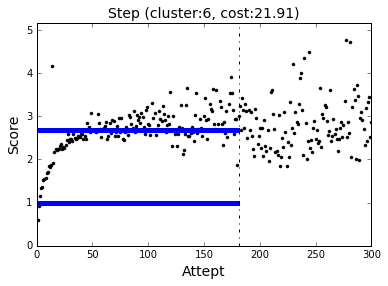

In [ ]:
def disp_MultipleCurve():
    x = np.linspace(1, 300, 300)
    curve_color = ['blue', 'red', 'darkgreen', 'blue', 'red', 'darkgreen', 'blue', 'red', 'darkgreen', 'blue']
    for piece in range(9): # for pieces
        for clt in range(nClt): # for clusters

            x_range = "x{0}".format(clt+1)
            y_val = "y{0}".format(clt+1)
            lsq = "lsq{0}".format(clt+1)
            pred = "pred{0}".format(clt+1)
            count = 0 # count for colour
            cost = []

            x_idx = dcp.open_Pickle('../../data/pickles/Fitting/300Attempts/Step/pieces{0}/avg{1}/index.pickle'.format(piece+2, clt+1))

            seed = [1, 1]
            func_name = cv.step_curve
            least_name = cv.step_least
            parameters = np.zeros(len(x_idx))

            plt.clf()
            plt.plot(attempts300, eval('avg{0}'.format(clt+1)), '.', c='black')
            for i in range(len(x_idx)):
                #print(x_idx[i])

                locals()[x_range] = x[:int(x_idx[1])-1]
                #print(eval(x_range)[0])
                locals()[y_val] = eval('avg{0}'.format(clt+1))[:int(x_idx[1])-1]
                #print(len(eval(y_val)))
                locals()[lsq] = least_squares(least_name, seed, args=(eval(x_range), eval(y_val)))
                print("piece:{0}, len:{1}".format(piece, len(eval(lsq).x)))

                locals()[pred] = func_name(eval(x_range), eval(lsq).x)
                
                plt.plot(eval(x_range), eval(pred), '-', c = curve_color[count], linewidth=5)
                plt.plot([x_idx[1]]*50, np.linspace(0, max(eval(y_val))+2, 50), '-.', c='black', linewidth=1)
                cost.append(eval(lsq).cost)
                parameters = eval(lsq).x # save parameters
                count = count+1
               

                plt.title("Step (cluster:{0}, cost:{1})".format(clt+1, round(np.sum(cost), 2)), fontsize=14)
                plt.ylabel('Score', fontsize=14)
                plt.xlabel('Attept', fontsize=14)
                plt.ylim([0, max( eval(y_val) )+1])

                dcp.make_folders("../../Figs/curve_fitting/MultiCurves/Step/pieces{0}/".format(piece+2))
                plt.savefig("../../Figs/curve_fitting/MultiCurves/Step/pieces{0}/avg{1}".format(piece+2, clt+1))
                dcp.make_Pickle(parameters, '../../data/pickles/Fitting/300Attempts/Step/pieces{0}/avg{1}/params.pickle'.format(piece+2, clt+1))

disp_MultipleCurve()

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/step/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed, 
        "../../Figs/curve_fitting/step/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed, 
        "../../Figs/curve_fitting/step/single/dummy", clt_num = i+1)
    
    ## validation
    y_fit_valid = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    y_fit_true = cv.exponential_curve2(attempts300, true_opt[0], true_opt[1])
    
    exp2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp2_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/step/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp2_cost_valid)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
          file_path="../../Figs/curve_fitting/step/single/true{0}".format(i+1), 
          clt_num=i+1, cost = exp2_cost_true)